# Reconocer dígitos en lenguaje de señas

La tarea tiene como objetivo reconocer dígitos en lenguaje de señas.

Hay un total de 10 preguntas que deben ser respondidas y celdas con código fuente que hay que completar. 

Tratar de alcanzar una precisión (accuracy) mayor a 0.90 en el dataset de test, lo recomendable es llegar a 0.95.

El plazo de entrega es hasta el miércoles 18 de diciembre.

Utilizar JupyterHub o una instalación de Jupyter local (Anaconda3) para realizar la tarea.

In [2]:
# Importamos librerías.

import os
import numpy as np
from os import listdir
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras import initializers
#[FMaresca]
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from PIL import Image
import imageio

import matplotlib.pyplot as plt
import zipfile

## Unzip de los datos de imágenes

In [ ]:
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

Asignamos algunas configuraciones, es posible utilizar un tamaño de imagen más chico seteando `img_size`. Con `test_size` asignamos el porcentaje de imágenes para el dataset de testing.

In [3]:
img_size = 64
num_class = 10
test_size = 0.2

## Importamos dataset

Usaremos un dataset el cuál contiene 1650 imágenes con 10 categorías diferentes. Cada categoría es un dígito del 0 al 9 representado en lenguaje de señas. Cada imagen posee una resolución de 100x100 pixels y cada pixel ocupa 3 valores de color (RGB).

La siguiente celda carga las imágenes desde la carpeta 'sign_language_digits'. Para descomprimir un archivo zip en Jupyer se puede ejecutar la siguiente línea en una celda:

`!unzip sign_language_digits.zip`

In [6]:
def get_img(data_path):
    # Getting image array from path:
    img = Image.open(data_path)
    img = img.resize((img_size, img_size))
    return np.asarray(img)

def get_dataset(dataset_path='./input_images/sign_language_digits'):
    labels = listdir(dataset_path) # Geting labels
    X = []
    Y = []
    for i, label in enumerate(labels):
        datas_path = dataset_path+'/'+label
        for data in listdir(datas_path):
            img = get_img(datas_path+'/'+data)
            X.append(img)
            Y.append(int(label))
    X = np.array(X).astype('float32')/255.
    Y = np.array(Y).astype('int')
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size)
    return X, X_test, Y, Y_test


Separamos el dataset de testing con el de entrenamiento

In [7]:
X, X_test, Y, Y_test = get_dataset()

Mostramos un ejemplo de imagen.

Etiqueta de la imagen: 9


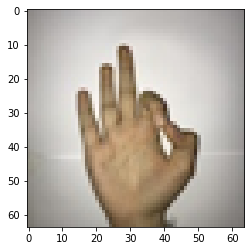

In [9]:
nro_imagen = 3

image = X[nro_imagen].reshape(1, img_size, img_size, 3)
plt.imshow(X[nro_imagen])
print("Etiqueta de la imagen: "+str(Y[nro_imagen]))

Tenemos 4 vectores:

* `X` e `Y` son arrays del *training set*—los datos que usaremos para entrenar el modelo.
* El modelo será testeado con el *test set*, `X_test` e `Y_test` arrays.

Las imágenes son matrices de 64x64x3 (si seteamos img_size=64), cada componente de los 3 que tiene cada pixel toma valores reales entre 0 y 1. Los *labels* es un array de enteros en el rango de 0 a 9. Corresponden al dígito que representa la imagen.

## Exploración los datos

Antes de construir y entrenar un modelo debemos conocer los datos.

In [10]:
# Tamaño del dataset de entrenamiento.
X.shape

(1330, 64, 64, 3)

In [11]:
# Cantidad de labels de entrenamiento.
len(Y)

1330

In [12]:
# Cada label es un entero entre 0 y 9.
Y

array([7, 1, 7, ..., 9, 0, 1])

Completa las siguientes dos celdas para mostrar el tamaño del dataset de test.

In [13]:
# Tamaño del dataset de test

# TU CODIGO AQUI
X_test.shape

(333, 64, 64, 3)

In [14]:
# Cantidad de labels de test.

# TU CODIGO AQUI
len(Y_test)

333

Prueba con Data Augmentation para aumentar el dataset de train "artificialmente"

In [15]:
#[FMaresca]: [Test]: Agrego Data Augmentation para multiplicar el set de train
#[FMaresca]: No fue usado al final... no logré buenos resultados por falta de conocimiento con el generador
aug = ImageDataGenerator(rotation_range=25, 
                         zoom_range=0.15,
                         width_shift_range=0.2, 
                         height_shift_range=0.2, 
                         shear_range=0.15,
                         horizontal_flip=True, 
                         fill_mode="nearest")

## Construir el modelo

Para nuestra solución construiremos una red neuronal.

**PREGUNTAS**

**1) ¿Qué razones hay para utilizar redes neuronales en la resolución de este problema?**

*Las redes neuronales son muy buenas en temas relacionados al reconocimiento de imagen y patrones. Son ideales para trabajar con una gran cantidad de parámetros de entrada (todos los píxeles de cada imagen).*

**2) ¿Qué cantidad de features (input) tendrá la red (considerar la variable img_size)?**

*La red tendrá un número de entradas igual a 64x64x3 o 12288*

**3) ¿Qué representa cada feature?**

*1 pixel y 1 canal(valor rgb o similar) de la imagen*

**4) La última capa de la red, ¿Cuántas neuronas deberá tener? ¿Por qué?**

*Deberá tener 10 neuronas. Esto es porque el resutlado es un número del 0 al 9 y la red arrojará la probabilidad de que la imagen sea cada uno de esos 10 números.*

**5) ¿Utilizarías una red convolucional? ¿Por qué?**

*Es un buen método para reducir la resolución de la imagen obteniendo así un conjunto de características inferior al de entrada (en tamaño). Esto genera que una de las nuevas características se corresponda a un mayor campo de activación de la imagen de entrada (una zona mayor). A su vez aydua a acelarar el proceso de ajustes y cálculo en las capas neuronales internas totalmente conectadas.*


### Construir las capas de la red

La unidad básica de construcción de una red neuronal en keras son las capas (layer). 



### Algunos tipos de capas que podemos usar

**Conv2D** (https://keras.io/layers/convolutional/)

Capa convolucional. Parámetros:

* *filters*: Cantidad de filtros o canales.

* *kernel_size*: Tamaño de la ventana que recorrerá la imagen. Ejemplos: (3,3), (5,5), (7,7).
* *input_shape*: La dimensión y tamaño de los datos de entrada. Es necesario definirla solamente en la primera capa de la red, en las otras será igual a la salida de la capa anterior. **Ejemplo:** si tenemos como entrada imágenes de 150x100x3 input_shape será (150,100,3).

* *padding*: Aumenta el tamaño de entrada con 0's, de esta manera podemos ajustar el tamaño del feature map generado aplicando el kernel. *padding* puede ser 'valid' el cuál no agregará nada o 'same' que agregará tantos ceros tal que el feature map generado sea del mismo tamaño que la entrada.

<img src="https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/keras-conv2d/keras_conv2d_padding.gif" width="500">

La red convolucional 2D espera de entrada imágenes donde cada pixel puede tener 1 o más valores (escala de grises, RGB). En nuestro caso será RGB.




**MaxPooling2D** (https://keras.io/layers/pooling/)

Capa de pooling, comúnmente usada luego de una capa convolucional. Selecciona y reduce la cantidad de valores. Parámetros:

* *pool_size*: Reduce el tamaño de entrada de forma: (vertical, horizontal). Ejemplo: (2,2)



**Flatten** (https://keras.io/layers/core/)

Redimensiona la estructura de la entrada y retorna un vector manteniendo los mismos valores.

Por ejemplo, luego de varias capas convolucionales y pooling tendremos varios canales (features maps) donde cada uno será una matriz dos dimensiones, se puede pensar como una estructura en 3 dimensiones. Para conectarla con una capa de neuronas densa (todas conectadas con todas) se debe redimensionar a un vector, se utiliza Flatten para conectar parte convolucional con capas densas.


**Dense** (https://keras.io/layers/core/)

Capa de neuronas, se conecta todas las entradas con todas las neuronas.

* *units*: Cantidad de neuronas de la capa.
* *activation*: Función de activación (https://keras.io/activations/), funciones comúnmente utilizadas: 'softmax', 'relu', 'sigmoid'.



***Bosquejo de una arquitectura con capas convolucionales, pooling y capas densas:***

<img src="https://missinglink.ai/wp-content/uploads/2019/07/A-Convolutional-Neural-Network.png" width="800">

In [16]:
# Se da un diseño inicial de la red neuronal.
# A las capas dadas les falta setear algunas configuraciones (se muestra con ...)

# Es posible utilizar una activación para la salida (última capa) y otra activación diferente
# para las capas internas, probar con la activación relu para las capas internas.

model = Sequential()
#[FMaresca]:
#- Input_shape = (height, width, depth)
#- Aplicar regularization ayuda a: (1)Reducir el efecto de overfitting 
# e (2)Incrementar la abilidad del modelo para generalizar
#- Initializer "he_normal" funcionó mejor que el anterior
#------------------
# La 1er capa convolucional aprende 16 filtros
model.add(Conv2D(16, (7, 7), strides=(2, 2), padding="valid",
                 kernel_initializer="he_normal", kernel_regularizer=l2(0.0005), input_shape=(64,64,3)))

#[FMaresca]:
# Después acumulo 2 capas más en las cuales se van a aprender 32 filtros
#------------------
model.add(Conv2D(32, (3, 3), padding="same",
                 kernel_initializer="he_normal", kernel_regularizer=l2(0.0005)))
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3), strides=(2, 2), padding="same",
                 kernel_initializer="he_normal", kernel_regularizer=l2(0.0005)))
model.add(Activation("relu"))
model.add(Dropout(0.25))

#[FMaresca]:
# Nuevamente acumulo 2 capas incrementando la cantidad de filtros para aprender
#------------------
model.add(Conv2D(64, (3, 3), padding="same",
                 kernel_initializer="he_normal", kernel_regularizer=l2(0.0005)))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="same",
                 kernel_initializer="he_normal", kernel_regularizer=l2(0.0005)))
model.add(Activation("relu"))
model.add(Dropout(0.25))

#[FMaresca]:
# Por último, vuelvo a incrementar los filtros. En este caso hasta 128
#------------------
model.add(Conv2D(128, (3, 3), padding="same",
                 kernel_initializer="he_normal", kernel_regularizer=l2(0.0005)))
model.add(Activation("relu"))
model.add(Conv2D(128, (3, 3), strides=(2, 2), padding="same",
                 kernel_initializer="he_normal", kernel_regularizer=l2(0.0005)))
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Flatten())
# Agregar más capas densas.
#[FMaresca]: 1er capa totalmente conectada
#------------------
model.add(Dense(512, kernel_initializer="he_normal"))
model.add(Activation("relu"))
model.add(Dropout(0.5))

#[FMaresca]: 2da capa totalmente conectada (Salida)
#------------------
model.add(Dense(10, activation='softmax'))


### Compilar el modelo

Antes de comenzar a entrenar el modelo hay que setear algunas configuraciones extras. Se setean durante el paso de *compilación*:

* *Loss function* —Mide cuál es el error del modelo durante el entrenamiento. El objetivo es minimizar esta función.
* *Optimizer* —Es cómo se actualizará los parámetros del modelo para minimizar la función de pérdida (loss function).
* *Metrics* —Para monitorizar la etapa de entrenamiento. Usaremos *accuracy*, la fracción de las imágenes que son correctamente clasificadas.

In [ ]:
# Con sparse_categorical_crossentropy no es necesario aplicar one-hot-encoding.
# Podemos utilizar los labels directamente como enteros.

#[FMaresca]: Para compenzar los ajustes muy bruscos al buscar el mínimo de la función (pasó en varias simulaciones
#luego de usar el método de data augmentation)
optim = Adam(lr = 0.0005)
model.compile(optimizer = optim,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
# Mostramos un resumen de la red neuronal.

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 16)        2368      
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 activation (Activation)     (None, 29, 29, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 15, 15, 32)        0         
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        1

## Entrenamos el modelo

Para entrenar el modelo utilizamos la función *fit*, esto hará que el modelo se ajuste a los datos de entrenamiento:

In [19]:
# Podrás modificar epochs y batch_size para obtener un mejor resultado o rendimiento.

#[FMaresca]: Generación "normal" del proceos de ajsute
history = model.fit(X, Y, validation_data=(X_test, Y_test), epochs=40, batch_size=30)

#[FMaresca]: Proceso de ajuste en base a Data Augmentation (con ImageDataGenerator)
#[FMaresca]: No logré hacer funcionar bien el método con ImageDataGeneration
#history = model.fit_generator(aug.flow(X, Y, batch_size=30), validation_data=(X_test, Y_test), epochs=25)

Epoch 1/40
45/45 [==============================] - 8s 114ms/step - loss: 3.0406 - accuracy: 0.1098 - val_loss: 2.7486 - val_accuracy: 0.0781
Epoch 2/40
45/45 [==============================] - 5s 109ms/step - loss: 2.7461 - accuracy: 0.1053 - val_loss: 2.7320 - val_accuracy: 0.1351
Epoch 3/40
45/45 [==============================] - 5s 110ms/step - loss: 2.7229 - accuracy: 0.1256 - val_loss: 2.6899 - val_accuracy: 0.1742
Epoch 4/40
45/45 [==============================] - 5s 101ms/step - loss: 2.6573 - accuracy: 0.1744 - val_loss: 2.3959 - val_accuracy: 0.3934
Epoch 5/40
45/45 [==============================] - 5s 106ms/step - loss: 2.2403 - accuracy: 0.3669 - val_loss: 1.7402 - val_accuracy: 0.5706
Epoch 6/40
45/45 [==============================] - 5s 103ms/step - loss: 1.9050 - accuracy: 0.4850 - val_loss: 1.5167 - val_accuracy: 0.6607
Epoch 7/40
45/45 [==============================] - 5s 101ms/step - loss: 1.5632 - accuracy: 0.6098 - val_loss: 1.0925 - val_accuracy: 0.7868
Epoch 

**PREGUNTAS**

**6) ¿Qué es el overfitting?**

*El overfitting es el resultado de ajustar en demasia un modelo a los datos de entrenamiento.*


**7) ¿Por qué lo queremos evitar?**

*Porque un modelo demasiado ajustado a los datos de entrenamiento va a presentar un mal desempeño frente a nueva información (desconocia para él), ya que va a tener menos libertad de movilidad frente a datos que se "salen o alejan" de los de train. Esto aumenta la probabilidad de hacer malas predicciones.*


## Evaluar el modelo

Evaluamos el modelo con el dataset de train y test, luego graficamos la evolución del error y la precisión:

In [20]:
train_loss, train_acc = model.evaluate(X, Y)
test_loss, test_acc = model.evaluate(X_test, Y_test)

print('\nTrain accuracy:', train_acc)
print('\nTest accuracy:', test_acc)

11/11 [==============================] - 0s 15ms/step - loss: 0.5444 - accuracy: 0.9580

Train accuracy: 1.0

Test accuracy: 0.9579579830169678


**PREGUNTA**

**8) ¿Por qué el accuracy de test es menor al de train?**

*La información de Train es información conocida por el modelo y empleada durante todo el proceso de entrenamiento para su ajuste paramétrico. Esto hace que dicho modelo se acerque muy bien a predecir todos los datos presentes en ese set. Por el contrario, la información de Test son datos desconocidos para él. Esto genera que sea puesto a prueba completamente y nos permite simular y medir su posible comportamiento en el "mundo real". Es esperable que el desempeño del modelo en producción se ajsute más al accuracy de Test que al de Train*


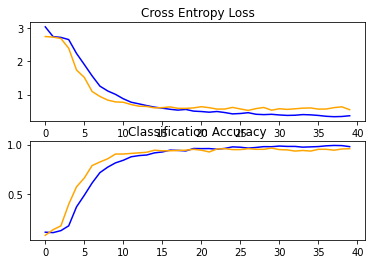

In [22]:
# Color azul: Entrenamiento.
# Color naranja: Testing.

from matplotlib import pyplot

# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')

# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

pyplot.show()

**PREGUNTA**

**9) En la gráfica, si la brecha entre ambos accuracy (training y test) es muy grande ¿Qué puede estar sucediendo?**

*Puede estar ocurriendo overfitting, lo que implica que el modelo se está ajustando tan bien al set de entrenamiento que su capacidad para predecir imágenes por fuera de dicho set es mala. 
Otra opción podría ser el underfitting, lo cual implica un modelo "pobremente" diseñado o entrenado (aunque en este caso se debería ver un mal "Train accuracy")*


## Haciendo predicciones

Con el modelo entrenado podemos hacer predicciones sobre algunas imágenes.

In [23]:
predictions = model.predict(X_test)

Podemos ver qué predice nuestro modelo para la primera imagen:

In [24]:
predictions[7]

array([2.4214792e-11, 9.9999046e-01, 9.4975476e-06, 2.8745004e-09,
       4.5518915e-15, 1.7820901e-16, 1.5490563e-13, 1.5062611e-10,
       6.9717621e-11, 4.7999937e-12], dtype=float32)

**PREGUNTA**

**10) ¿Qué representa el vector *predictions*?**

*Representa el vector de etiquetas (del 0 al 9) para una imagen dada. Los valores son la probabilidad de que una imagen se corresponde con cada una de esas etiquetas. La componente del vector con mayor valor va a determinar cuál es la etiqueta que predijo el modelo para la imagen en ceustión.*


Vemos qué clase predice y cuál es la clase correcta para la primera imagen:

In [25]:
np.argmax(predictions[7])

1

In [26]:
Y_test[7]

1

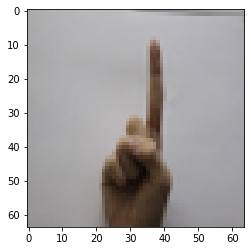

In [27]:
nro_imagen = 7

image = X_test[nro_imagen].reshape(1, img_size, img_size, 3)
plt.imshow(X_test[nro_imagen])